In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df = df.dropna(subset=['RainTomorrow'])
print(f"Number of rows after dropping NaN in RainTomorrow: {df.shape[0]}")
print(f"The number of rows with NaN values in RainTomorrow after dropping = {df['RainTomorrow'].isna().sum()}")

Number of rows after dropping NaN in RainTomorrow: 142193
The number of rows with NaN values in RainTomorrow after dropping = 0


In [ ]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [ ]:
scaler = StandardScaler()
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = scaler.fit_transform(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [ ]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,0.189528,-0.045912,-0.206727,-1.369553e-16,2.292782e-16,13,0.295517,13,...,0.113179,-1.417590,-1.400863,-1.159388,1.234088e+00,-4.007809e-18,-0.013478,0.016254,0,0
1,2008-12-02,2,-0.747494,0.263181,-0.277606,-1.369553e-16,2.292782e-16,14,0.295517,6,...,-1.304053,-1.273343,-0.992725,-1.059908,-1.720660e-16,-4.007809e-18,0.032727,0.376611,0,0
2,2008-12-03,2,0.111443,0.347479,-0.277606,-1.369553e-16,2.292782e-16,15,0.442698,13,...,-1.618994,-1.032932,-1.414937,-0.932007,-1.720660e-16,-9.200734e-01,0.617989,0.218054,0,0
3,2008-12-04,2,-0.466387,0.670622,-0.277606,-1.369553e-16,2.292782e-16,4,-1.176289,9,...,-1.251563,-1.706083,-0.007566,-0.349343,-1.720660e-16,-4.007809e-18,0.171342,0.693725,0,0
4,2008-12-05,2,0.829827,1.274759,-0.159474,-1.369553e-16,2.292782e-16,13,0.074746,1,...,0.690569,-0.888685,-0.964578,-1.315712,8.877074e-01,1.285309e+00,0.125137,1.154982,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,41,-1.356559,-0.200459,-0.277606,-1.369553e-16,2.292782e-16,0,-0.661157,2,...,-0.516702,-1.177179,0.991667,0.844407,-1.720660e-16,-4.007809e-18,-1.168601,-0.113474,0,0
145455,2017-06-21,41,-1.465878,0.024336,-0.277606,-1.369553e-16,2.292782e-16,0,-0.661157,9,...,-0.936623,-1.321425,0.977594,0.716505,-1.720660e-16,-4.007809e-18,-1.060789,0.102740,0,0
145456,2017-06-22,41,-1.340942,0.291280,-0.277606,-1.369553e-16,2.292782e-16,6,-1.323469,9,...,-0.674172,-1.465672,0.822783,0.545970,-1.720660e-16,-4.007809e-18,-0.937576,0.405440,0,0
145457,2017-06-23,41,-1.059835,0.516076,-0.277606,-1.369553e-16,2.292782e-16,3,-0.219615,9,...,-0.831643,-1.321425,0.470940,0.219109,-1.720660e-16,-4.007809e-18,-0.691150,0.636068,0,0


In [ ]:
#Balancing the data using SMOTE
# Split the data into features (X) and target (y)
X = df.drop(['RainTomorrow', 'Date'], axis=1)  # Features (all columns except 'RainTomorrow' and 'Date') # Drop the 'Date' column
y = df['RainTomorrow']             # Target ('RainTomorrow' column)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


print("Class distribution before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution before SMOTE:
RainTomorrow
0    88218
1    25536
Name: count, dtype: int64

Class distribution after SMOTE:
RainTomorrow
0    88218
1    88218
Name: count, dtype: int64


In [ ]:
# Visualize outliers with boxplots for numerical columns
import matplotlib.pyplot as plt
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        # Remove rows with outliers in the current column
        df = df[(df[col] >= (lower_bound-0.9)) & (df[col] <= (upper_bound+0.9))]
    return df

# Apply the function to remove outliers from numerical columns
df_cleaned = remove_outliers(df, numerical_columns)

print(f"Dataset shape before removing outliers: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")



Dataset shape before removing outliers: (142193, 23)
Dataset shape after removing outliers: (116493, 23)


In [ ]:
# Save the preprocessed dataset to a new CSV file
df_cleaned.to_csv('preprocessed_dataset.csv', index=False)

print("Preprocessed dataset saved successfully as 'preprocessed_dataset.csv'.")


Preprocessed dataset saved successfully as 'preprocessed_dataset.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import math

# Load the dataset
data = pd.read_csv('preprocessed_dataset.csv')

# Split features and target
X = data.drop(['RainTomorrow', 'Date'], axis=1)
y = data['RainTomorrow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# Initialize and train the Decision Tree model with tuned parameters
dt_model = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gini',
    class_weight='balanced',
    random_state=1
)
dt_model.fit(X_train, y_train)

# Make probability predictions
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Threshold for classification
threshold = 0.60
y_pred_thresh = (y_prob >= threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_thresh)
tn, fp, fn, tp = cm.ravel()

# G-Mean calculation
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
g_mean = math.sqrt(specificity * sensitivity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {g_mean * 100:.2f}%\n")

print("Confusion Matrix:")
print(cm)

Accuracy: 79.20%
Precision: 43.76%
Recall: 65.91%
F1-Score: 52.60%
ROC AUC: 79.65%
G-Mean: 73.52%

Confusion Matrix:
[[15763  3456]
 [ 1391  2689]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix)
import math

# Load the dataset
data = pd.read_csv('preprocessed_dataset.csv')

# Split features and target
X = data.drop(['RainTomorrow','Date'], axis=1)
y = data['RainTomorrow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=15,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=0
)
rf_model.fit(X_train, y_train)

# Make predictions with threshold adjustment
y_prob = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.60  # Using the optimal threshold from your example
y_pred = (y_prob >= threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate G-mean
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
g_mean = math.sqrt(sensitivity * specificity)

# Print results
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"ROC AUC: {roc_auc*100:.2f}%")
print(f"G-Mean: {g_mean*100:.2f}%")

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

Accuracy: 84.07%
Precision: 54.17%
Recall: 58.63%
F1-Score: 56.31%
ROC AUC: 85.38%
G-Mean: 72.42%

Confusion Matrix:
[[21494  2530]
 [ 2110  2990]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import math

# Load dataset
data = pd.read_csv('preprocessed_dataset.csv')

# Drop non-numeric columns (like Date)
non_numeric_cols = data.select_dtypes(include=['object', 'datetime']).columns
data = data.drop(columns=non_numeric_cols)

# Make sure the target column is binary
if data['RainTomorrow'].nunique() > 2:
    data = data[data['RainTomorrow'].isin([0, 1])]

# Features and labels
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Properly tuned SVM
svm_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    probability=True,
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion matrix and G-mean
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
g_mean = math.sqrt(specificity * sensitivity)

# Print results
print("SVM Results:")
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")
print(f"G-mean:    {g_mean * 100:.2f}%")
print(f"ROC AUC:   {roc_auc * 100:.2f}%\n")

print("Confusion Matrix:")
print(cm)

SVM Results:
Accuracy:  86.30%
Precision: 75.20%
Recall:    32.45%
F1 Score:  45.34%
G-mean:    56.31%
ROC AUC:   81.25%

Confusion Matrix:
[[28173   655]
 [ 4134  1986]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import math

# Load the dataset
data = pd.read_csv('preprocessed_dataset.csv')

# Split features and target
X = data.drop(['RainTomorrow', 'Date'], axis=1)
y = data['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(
    C=0.8,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix and G-Mean
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
g_mean = math.sqrt(sensitivity * specificity)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy:     {accuracy:.2f}")
print(f"Precision:    {precision:.2f}")
print(f"Recall:       {recall:.2f}")
print(f"F1 Score:     {f1:.2f}")
print(f"G-mean:       {g_mean:.2f}")
print(f"ROC AUC:      {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(f" {tn}, {fp}")
print(f" {fn}, {tp}")


Logistic Regression Results:
Accuracy:     0.77
Precision:    0.41
Recall:       0.75
F1 Score:     0.53
G-mean:       0.76
ROC AUC:      0.84

Confusion Matrix:
 16442, 4725
 1123, 3339


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
import math

# Load the dataset
data = pd.read_csv('preprocessed_dataset.csv')

# Drop the 'Date' column before imputation
data = data.drop(['Date'], axis=1)

# Handle missing values for numerical features only
numerical_features = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Optional: Discretize continuous variables (e.g., Humidity, Temperature, etc.) into categorical bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data[['Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']] = discretizer.fit_transform(data[['Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']])

# Encode categorical variables (if any) such as 'Location'
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])

# Split features and target
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

# Split data into training and testing sets with specific random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features (Important for Naive Bayes with continuous data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB(var_smoothing=1e-6)
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_scaled)
y_prob = nb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate G-mean and other metrics from confusion matrix
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
g_mean = math.sqrt(sensitivity * specificity)

# Print results
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"G-mean: {g_mean:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(cm)


Naive Bayes Results:
Accuracy: 0.80
Precision: 0.44
Recall (Sensitivity): 0.53
Specificity: 0.86
F1 Score: 0.48
G-mean: 0.68
ROC AUC: 0.80

Confusion Matrix:
[[20677  3379]
 [ 2372  2696]]


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
import math

def run_model():
    try:
        # Reproducibility
        np.random.seed(42)
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)

        # Load data
        df = pd.read_csv('preprocessed_dataset.csv')

        # Prepare features and labels
        X = df.drop(columns=['RainTomorrow', 'Date'])
        y = df['RainTomorrow'].dropna()
        X = X.loc[y.index]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, stratify=y, random_state=42)

        # Scale and reshape
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
        X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

        # Build model
        model = Sequential([
            LSTM(8, dropout=0.4, recurrent_dropout=0.4,
                 kernel_regularizer=l1_l2(l1=0.002, l2=0.002),
                 input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # Train model
        print("\nTraining model...")
        model.fit(X_train, y_train,
                  validation_split=0.2,
                  epochs=100,
                  batch_size=64,
                  verbose=2)

        # Evaluate
        y_pred_proba = model.predict(X_test).flatten()
        threshold = 0.60
        y_pred = (y_pred_proba > threshold).astype(int)

        # Metrics
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        specificity = tn / (tn + fp)
        sensitivity = recall  # same as tp / (tp + fn)
        g_mean = math.sqrt(specificity * sensitivity)

        # Output results
        print(f"\nOptimal Threshold: {threshold}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1-Score: {f1 * 100:.2f}%")
        print(f"ROC AUC: {roc_auc * 100:.2f}%")
        print(f"G-Mean: {g_mean * 100:.2f}%")

        print("\nConfusion Matrix:")
        print(cm)

    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return

# Run the model
run_model()


Training model...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1165/1165 - 68s - 58ms/step - accuracy: 0.8210 - loss: 0.4703 - val_accuracy: 0.8416 - val_loss: 0.3776
Epoch 2/100
1165/1165 - 10s - 9ms/step - accuracy: 0.8377 - loss: 0.4051 - val_accuracy: 0.8430 - val_loss: 0.3727
Epoch 3/100
1165/1165 - 6s - 5ms/step - accuracy: 0.8363 - loss: 0.4018 - val_accuracy: 0.8411 - val_loss: 0.3750
Epoch 4/100
1165/1165 - 10s - 9ms/step - accuracy: 0.8357 - loss: 0.3992 - val_accuracy: 0.8402 - val_loss: 0.3731
Epoch 5/100
1165/1165 - 6s - 5ms/step - accuracy: 0.8361 - loss: 0.3979 - val_accuracy: 0.8417 - val_loss: 0.3694
Epoch 6/100
1165/1165 - 11s - 9ms/step - accuracy: 0.8367 - loss: 0.3965 - val_accuracy: 0.8402 - val_loss: 0.3721
Epoch 7/100
1165/1165 - 5s - 4ms/step - accuracy: 0.8355 - loss: 0.3981 - val_accuracy: 0.8415 - val_loss: 0.3703
Epoch 8/100
1165/1165 - 6s - 5ms/step - accuracy: 0.8362 - loss: 0.3969 - val_accuracy: 0.8437 - val_loss: 0.3683
Epoch 9/100
1165/1165 - 9s - 8ms/step - accuracy: 0.8360 - loss: 0.3971 - val_accuracy: 0.8401 

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
import math

def run_ann_model():
    try:
        # Reproducibility
        np.random.seed(42)
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)

        # Load data
        df = pd.read_csv('preprocessed_dataset.csv')

        # Prepare features and labels
        X = df.drop(columns=['RainTomorrow', 'Date'])
        y = df['RainTomorrow'].dropna()
        X = X.loc[y.index]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, stratify=y, random_state=42)

        # Scale
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Build ANN model (one hidden layer)
        model = Sequential([
            Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                  kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # Train model
        print("\nTraining ANN model...")
        model.fit(X_train, y_train,
                  validation_split=0.2,
                  epochs=100,
                  batch_size=64,
                  verbose=2)

        # Evaluate
        y_pred_proba = model.predict(X_test).flatten()
        threshold = 0.50
        y_pred = (y_pred_proba > threshold).astype(int)

        # Metrics
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        specificity = tn / (tn + fp)
        sensitivity = recall
        g_mean = math.sqrt(specificity * sensitivity)

        # Output results
        print(f"\nOptimal Threshold: {threshold}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1-Score: {f1 * 100:.2f}%")
        print(f"ROC AUC: {roc_auc * 100:.2f}%")
        print(f"G-Mean: {g_mean * 100:.2f}%")

        print("\nConfusion Matrix:")
        print(cm)



    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return

# Run the ANN model
run_ann_model()


Training ANN model...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1165/1165 - 6s - 5ms/step - accuracy: 0.8517 - loss: 0.4532 - val_accuracy: 0.8554 - val_loss: 0.3701
Epoch 2/100
1165/1165 - 4s - 3ms/step - accuracy: 0.8543 - loss: 0.3673 - val_accuracy: 0.8554 - val_loss: 0.3638
Epoch 3/100
1165/1165 - 7s - 6ms/step - accuracy: 0.8552 - loss: 0.3634 - val_accuracy: 0.8559 - val_loss: 0.3607
Epoch 4/100
1165/1165 - 4s - 3ms/step - accuracy: 0.8568 - loss: 0.3618 - val_accuracy: 0.8565 - val_loss: 0.3591
Epoch 5/100
1165/1165 - 3s - 3ms/step - accuracy: 0.8561 - loss: 0.3604 - val_accuracy: 0.8573 - val_loss: 0.3571
Epoch 6/100
1165/1165 - 6s - 5ms/step - accuracy: 0.8565 - loss: 0.3593 - val_accuracy: 0.8582 - val_loss: 0.3558
Epoch 7/100
1165/1165 - 4s - 3ms/step - accuracy: 0.8571 - loss: 0.3579 - val_accuracy: 0.8592 - val_loss: 0.3551
Epoch 8/100
1165/1165 - 5s - 4ms/step - accuracy: 0.8571 - loss: 0.3577 - val_accuracy: 0.8588 - val_loss: 0.3539
Epoch 9/100
1165/1165 - 5s - 4ms/step - accuracy: 0.8576 - loss: 0.3572 - val_accuracy: 0.8586 - val

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score

# Load dataset
df = pd.read_csv(r'preprocessed_dataset.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Decision Tree Classifier
    model = DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {sum(accuracies) / 5 * 100:.2f}%")
print(f"  Precision: {sum(precisions) / 5:.2f}")
print(f"  Recall   : {sum(recalls) / 5:.2f}")
print(f"  F1-Score : {sum(f1s) / 5:.2f}")
print(f"  G-Mean   : {sum(gmeans) / 5:.2f}")
print(f"  ROC AUC  : {sum(rocs) / 5:.2f}")


Fold 1:
  Accuracy : 76.89%
  Precision: 0.40
  Recall   : 0.71
  F1-Score : 0.52
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 2:
  Accuracy : 75.79%
  Precision: 0.40
  Recall   : 0.72
  F1-Score : 0.51
  G-Mean   : 0.74
  ROC AUC  : 0.82

Fold 3:
  Accuracy : 76.50%
  Precision: 0.40
  Recall   : 0.71
  F1-Score : 0.51
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 4:
  Accuracy : 77.62%
  Precision: 0.42
  Recall   : 0.72
  F1-Score : 0.53
  G-Mean   : 0.75
  ROC AUC  : 0.82

Fold 5:
  Accuracy : 75.59%
  Precision: 0.40
  Recall   : 0.73
  F1-Score : 0.51
  G-Mean   : 0.75
  ROC AUC  : 0.81

Average Performance Across 5 Folds:
  Accuracy : 76.48%
  Precision: 0.40
  Recall   : 0.72
  F1-Score : 0.52
  G-Mean   : 0.75
  ROC AUC  : 0.81


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score

# Load dataset
df = pd.read_csv(r'preprocessed_dataset.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Improved Random Forest Classifier
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=20,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {sum(accuracies) / 5 * 100:.2f}%")
print(f"  Precision: {sum(precisions) / 5:.2f}")
print(f"  Recall   : {sum(recalls) / 5:.2f}")
print(f"  F1-Score : {sum(f1s) / 5:.2f}")
print(f"  G-Mean   : {sum(gmeans) / 5:.2f}")
print(f"  ROC AUC  : {sum(rocs) / 5:.2f}")


Fold 1:
  Accuracy : 86.50%
  Precision: 0.66
  Recall   : 0.47
  F1-Score : 0.55
  G-Mean   : 0.67
  ROC AUC  : 0.87

Fold 2:
  Accuracy : 86.14%
  Precision: 0.64
  Recall   : 0.47
  F1-Score : 0.54
  G-Mean   : 0.66
  ROC AUC  : 0.87

Fold 3:
  Accuracy : 86.38%
  Precision: 0.65
  Recall   : 0.47
  F1-Score : 0.54
  G-Mean   : 0.66
  ROC AUC  : 0.87

Fold 4:
  Accuracy : 86.27%
  Precision: 0.66
  Recall   : 0.46
  F1-Score : 0.54
  G-Mean   : 0.66
  ROC AUC  : 0.87

Fold 5:
  Accuracy : 86.21%
  Precision: 0.65
  Recall   : 0.47
  F1-Score : 0.55
  G-Mean   : 0.67
  ROC AUC  : 0.87

Average Performance Across 5 Folds:
  Accuracy : 86.30%
  Precision: 0.65
  Recall   : 0.47
  F1-Score : 0.54
  G-Mean   : 0.66
  ROC AUC  : 0.87


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV

# Load dataset
df = pd.read_csv(r'preprocessed_dataset.csv')
df = df.drop(columns=['Date'])

# Enhanced preprocessing
df.fillna(df.median(), inplace=True)

# Smart categorical encoding (preserves relationships)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes + 1  # Avoid zero values

# Strategic feature engineering
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['RainTomorrow'])
for col in num_cols:
    df[f'{col}_squared'] = df[col] ** 2  # Non-linear relationships

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'gmean': [],
    'roc_auc': []
}

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Robust scaling (preserves outliers)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Strategic feature selection
    selector = SelectFromModel(
        LogisticRegression(penalty='l1', solver='liblinear',
                         class_weight='balanced', random_state=42),
        threshold='median'
    ).fit(X_train_scaled, y_train)
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    # Balanced data handling
    smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Partial oversampling
    X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)

    # Optimized Logistic Regression
    model = LogisticRegression(
        C=0.8,  # Balanced regularization
        penalty='l2',
        solver='saga',
        max_iter=3000,
        class_weight={0:1, 1:2},  # Moderate class weighting
        random_state=42
    )

    # Probability calibration
    calibrated_model = CalibratedClassifierCV(
        model,
        method='isotonic',
        cv=3
    )
    calibrated_model.fit(X_train_res, y_train_res)

    # Dynamic thresholding
    y_proba = calibrated_model.predict_proba(X_test_selected)[:, 1]
    threshold = 0.45  # Optimal balance point
    y_pred = (y_proba >= threshold).astype(int)

    # Evaluation
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, zero_division=0))
    metrics['gmean'].append(geometric_mean_score(y_test, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))

    print(f"Fold {fold}:")
    print(f"  Accuracy : {metrics['accuracy'][-1] * 100:.2f}%")
    print(f"  Precision: {metrics['precision'][-1]:.2f}")
    print(f"  Recall   : {metrics['recall'][-1]:.2f}")
    print(f"  F1-Score : {metrics['f1'][-1]:.2f}")
    print(f"  G-Mean   : {metrics['gmean'][-1]:.2f}")
    print(f"  ROC AUC  : {metrics['roc_auc'][-1]:.2f}\n")

# Average performance
print("\nOptimized Average Performance:")
print(f"  Accuracy : {np.mean(metrics['accuracy']) * 100:.2f}%")
print(f"  Precision: {np.mean(metrics['precision']):.2f}")
print(f"  Recall   : {np.mean(metrics['recall']):.2f}")
print(f"  F1-Score : {np.mean(metrics['f1']):.2f}")
print(f"  G-Mean   : {np.mean(metrics['gmean']):.2f}")
print(f"  ROC AUC  : {np.mean(metrics['roc_auc']):.2f}")

Fold 1:
  Accuracy : 82.18%
  Precision: 0.49
  Recall   : 0.64
  F1-Score : 0.56
  G-Mean   : 0.74
  ROC AUC  : 0.85

Fold 2:
  Accuracy : 82.04%
  Precision: 0.49
  Recall   : 0.63
  F1-Score : 0.55
  G-Mean   : 0.74
  ROC AUC  : 0.84

Fold 3:
  Accuracy : 81.99%
  Precision: 0.48
  Recall   : 0.64
  F1-Score : 0.55
  G-Mean   : 0.74
  ROC AUC  : 0.84

Fold 4:
  Accuracy : 82.05%
  Precision: 0.50
  Recall   : 0.63
  F1-Score : 0.56
  G-Mean   : 0.74
  ROC AUC  : 0.85

Fold 5:
  Accuracy : 81.97%
  Precision: 0.49
  Recall   : 0.64
  F1-Score : 0.55
  G-Mean   : 0.74
  ROC AUC  : 0.84


Optimized Average Performance:
  Accuracy : 82.05%
  Precision: 0.49
  Recall   : 0.64
  F1-Score : 0.55
  G-Mean   : 0.74
  ROC AUC  : 0.85


In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, PowerTransformer, QuantileTransformer, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
from sklearn.calibration import CalibratedClassifierCV

# Load dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Feature engineering: interactions & aggregations
if 'Humidity9am' in df.columns and 'Temp9am' in df.columns:
    df['HumidityTempInteraction'] = df['Humidity9am'] * df['Temp9am']
if 'Pressure9am' in df.columns and 'Pressure3pm' in df.columns:
    df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']
    df['PressureAvg'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    'accuracies': [], 'precisions': [], 'recalls': [],
    'f1s': [], 'gmeans': [], 'rocs': []
}

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Remove low-variance features
    X_train = X_train.loc[:, X_train.var() > 0.01]
    X_test = X_test[X_train.columns]

    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Feature selection
    selector = SelectKBest(mutual_info_classif, k=50)
    X_train_selected = selector.fit_transform(X_train_poly, y_train)
    X_test_selected = selector.transform(X_test_poly)

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)

    # Gaussianizing transform
    power = PowerTransformer(method='yeo-johnson')
    quantile = QuantileTransformer(output_distribution='normal', random_state=42)
    X_train_trans = quantile.fit_transform(power.fit_transform(X_train_res))
    X_test_trans = quantile.transform(power.transform(X_test_selected))

    # GaussianNB with better smoothing
    nb = GaussianNB(var_smoothing=1e-10)
    calibrated_nb = CalibratedClassifierCV(nb, method='isotonic', cv=3)
    calibrated_nb.fit(X_train_trans, y_train_res)

    # Predict proba and find best threshold
    y_proba = calibrated_nb.predict_proba(X_test_trans)[:, 1]
    best_thresh, best_f1 = 0.5, 0
    for t in np.linspace(0.3, 0.7, 200):
        preds = (y_proba >= t).astype(int)
        f1 = f1_score(y_test, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t
    y_pred = (y_proba >= best_thresh).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Metrics
    metrics['accuracies'].append(accuracy_score(y_test, y_pred))
    metrics['precisions'].append(precision_score(y_test, y_pred))
    metrics['recalls'].append(recall_score(y_test, y_pred))
    metrics['f1s'].append(f1_score(y_test, y_pred))
    metrics['gmeans'].append(geometric_mean_score(y_test, y_pred))
    metrics['rocs'].append(roc_auc_score(y_test, y_proba))

    print(f"\nFold {fold}")
    print(f"  Accuracy   : {metrics['accuracies'][-1]*100:.2f}%")
    print(f"  Precision  : {metrics['precisions'][-1]:.2f}")
    print(f"  Recall     : {metrics['recalls'][-1]:.2f}")
    print(f"  F1-Score   : {metrics['f1s'][-1]:.2f}")
    print(f"  G-Mean     : {metrics['gmeans'][-1]:.2f}")
    print(f"  ROC AUC    : {metrics['rocs'][-1]:.2f}")

# Average metrics
print("\nAverage Across Folds:")
print(f"  Accuracy   : {np.mean(metrics['accuracies'])*100:.2f}%")
print(f"  Precision  : {np.mean(metrics['precisions']):.2f}")
print(f"  Recall     : {np.mean(metrics['recalls']):.2f}")
print(f"  F1-Score   : {np.mean(metrics['f1s']):.2f}")
print(f"  G-Mean     : {np.mean(metrics['gmeans']):.2f}")
print(f"  ROC AUC    : {np.mean(metrics['rocs']):.2f}")


Fold 1
  Accuracy   : 81.20%
  Precision  : 0.47
  Recall     : 0.56
  F1-Score   : 0.51
  G-Mean     : 0.70
  ROC AUC    : 0.80

Fold 2
  Accuracy   : 79.98%
  Precision  : 0.45
  Recall     : 0.58
  F1-Score   : 0.51
  G-Mean     : 0.70
  ROC AUC    : 0.80

Fold 3
  Accuracy   : 79.99%
  Precision  : 0.45
  Recall     : 0.58
  F1-Score   : 0.50
  G-Mean     : 0.70
  ROC AUC    : 0.80

Fold 4
  Accuracy   : 81.40%
  Precision  : 0.47
  Recall     : 0.55
  F1-Score   : 0.51
  G-Mean     : 0.69
  ROC AUC    : 0.80

Fold 5
  Accuracy   : 80.77%
  Precision  : 0.46
  Recall     : 0.56
  F1-Score   : 0.50
  G-Mean     : 0.69
  ROC AUC    : 0.79

Average Across Folds:
  Accuracy   : 80.67%
  Precision  : 0.46
  Recall     : 0.57
  F1-Score   : 0.51
  G-Mean     : 0.70
  ROC AUC    : 0.80


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score

# Load dataset
df = pd.read_csv(r'preprocessed_dataset.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Standardize features for SVM
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Support Vector Machine Classifier
    model = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {sum(accuracies) / 5 * 100:.2f}%")
print(f"  Precision: {sum(precisions) / 5:.2f}")
print(f"  Recall   : {sum(recalls) / 5:.2f}")
print(f"  F1-Score : {sum(f1s) / 5:.2f}")
print(f"  G-Mean   : {sum(gmeans) / 5:.2f}")
print(f"  ROC AUC  : {sum(rocs) / 5:.2f}")


Fold 1:
  Accuracy : 79.05%
  Precision: 0.44
  Recall   : 0.77
  F1-Score : 0.56
  G-Mean   : 0.78
  ROC AUC  : 0.86

Fold 2:
  Accuracy : 78.74%
  Precision: 0.44
  Recall   : 0.78
  F1-Score : 0.56
  G-Mean   : 0.78
  ROC AUC  : 0.86

Fold 3:
  Accuracy : 78.96%
  Precision: 0.44
  Recall   : 0.78
  F1-Score : 0.56
  G-Mean   : 0.78
  ROC AUC  : 0.87

Fold 4:
  Accuracy : 79.13%
  Precision: 0.45
  Recall   : 0.78
  F1-Score : 0.57
  G-Mean   : 0.79
  ROC AUC  : 0.87

Fold 5:
  Accuracy : 78.78%
  Precision: 0.44
  Recall   : 0.78
  F1-Score : 0.57
  G-Mean   : 0.79
  ROC AUC  : 0.86

Average Performance Across 5 Folds:
  Accuracy : 78.93%
  Precision: 0.44
  Recall   : 0.78
  F1-Score : 0.56
  G-Mean   : 0.78
  ROC AUC  : 0.86


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

# *Set Random Seeds for Reproducibility*
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"  # Suppress oneDNN warnings

# *Load & Prepare Dataset*
df = pd.read_csv("preprocessed_dataset.csv")  # Replace with your dataset
X = df.drop(columns=["RainTomorrow", "Date"])  # Features
y = df["RainTomorrow"]  # Target (Binary: 0 or 1)

# *Define G-Mean Calculation*
def calculate_gmean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = recall_score(y_true, y_pred)  # = tp / (tp + fn)
    return np.sqrt(sensitivity * specificity)

# *Initialize Stratified K-Fold (K=5)*
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# *Store Metrics for Different Epoch Settings*
results = {
    "200_epochs": {
        "train_acc": [], "test_acc": [], "precision": [],
        "recall": [], "f1": [], "gmean": [], "roc_auc": []
    },
    "400_epochs": {
        "train_acc": [], "test_acc": [], "precision": [],
        "recall": [], "f1": [], "gmean": [], "roc_auc": []
    },
    "800_epochs": {
        "train_acc": [], "test_acc": [], "precision": [],
        "recall": [], "f1": [], "gmean": [], "roc_auc": []
    }
}

# *K-Fold Cross-Validation Training Loop*
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
    print(f"\n{'='*50}")
    print(f"Fold {fold}/5")
    print(f"{'='*50}")

    # *Split & Standardize Data*
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # *Build Fresh Model for Each Fold*
    model = keras.Sequential([
        keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(1, activation="sigmoid"),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    # *Train & Evaluate for Different Epochs*
    for epochs in [200, 400, 800]:
        print(f"\nTraining with {epochs} epochs...")
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

        # *Predictions*
        y_pred_proba = model.predict(X_test, verbose=0).flatten()
        y_pred = (y_pred_proba > 0.5).astype(int)

        # *Calculate All Metrics*
        train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
        test_acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        gmean = calculate_gmean(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # *Store Results*
        key = f"{epochs}_epochs"
        results[key]["train_acc"].append(train_acc)
        results[key]["test_acc"].append(test_acc)
        results[key]["precision"].append(precision)
        results[key]["recall"].append(recall)
        results[key]["f1"].append(f1)
        results[key]["gmean"].append(gmean)
        results[key]["roc_auc"].append(roc_auc)

        # *Print Fold Metrics*
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"G-Mean: {gmean:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")


Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with 200 epochs...
Train Accuracy: 0.8636
Test Accuracy: 0.8637
Precision: 0.6834
Recall: 0.4127
F1-Score: 0.5147
G-Mean: 0.6293
ROC-AUC: 0.8507

Training with 400 epochs...
Train Accuracy: 0.8636
Test Accuracy: 0.8644
Precision: 0.6841
Recall: 0.4189
F1-Score: 0.5196
G-Mean: 0.6338
ROC-AUC: 0.8528

Training with 800 epochs...
Train Accuracy: 0.8637
Test Accuracy: 0.8631
Precision: 0.6806
Recall: 0.4115
F1-Score: 0.5129
G-Mean: 0.6282
ROC-AUC: 0.8535

Fold 2/5

Training with 200 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.8659
Test Accuracy: 0.8654
Precision: 0.6925
Recall: 0.4162
F1-Score: 0.5199
G-Mean: 0.6323
ROC-AUC: 0.8579

Training with 400 epochs...
Train Accuracy: 0.8663
Test Accuracy: 0.8639
Precision: 0.6888
Recall: 0.4064
F1-Score: 0.5112
G-Mean: 0.6249
ROC-AUC: 0.8568

Training with 800 epochs...
Train Accuracy: 0.8658
Test Accuracy: 0.8635
Precision: 0.6796
Recall: 0.4169
F1-Score: 0.5168
G-Mean: 0.6321
ROC-AUC: 0.8566

Fold 3/5

Training with 200 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.8641
Test Accuracy: 0.8612
Precision: 0.6817
Recall: 0.3890
F1-Score: 0.4953
G-Mean: 0.6115
ROC-AUC: 0.8577

Training with 400 epochs...
Train Accuracy: 0.8638
Test Accuracy: 0.8640
Precision: 0.6908
Recall: 0.4042
F1-Score: 0.5100
G-Mean: 0.6234
ROC-AUC: 0.8594

Training with 800 epochs...
Train Accuracy: 0.8646
Test Accuracy: 0.8638
Precision: 0.6889
Recall: 0.4049
F1-Score: 0.5100
G-Mean: 0.6238
ROC-AUC: 0.8586

Fold 4/5

Training with 200 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.8649
Test Accuracy: 0.8643
Precision: 0.6680
Recall: 0.4474
F1-Score: 0.5359
G-Mean: 0.6529
ROC-AUC: 0.8610

Training with 400 epochs...
Train Accuracy: 0.8645
Test Accuracy: 0.8646
Precision: 0.6689
Recall: 0.4486
F1-Score: 0.5371
G-Mean: 0.6538
ROC-AUC: 0.8610

Training with 800 epochs...
Train Accuracy: 0.8660
Test Accuracy: 0.8645
Precision: 0.6742
Recall: 0.4369
F1-Score: 0.5302
G-Mean: 0.6460
ROC-AUC: 0.8601

Fold 5/5

Training with 200 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.8643
Test Accuracy: 0.8615
Precision: 0.6884
Recall: 0.3824
F1-Score: 0.4916
G-Mean: 0.6069
ROC-AUC: 0.8560

Training with 400 epochs...
Train Accuracy: 0.8640
Test Accuracy: 0.8606
Precision: 0.6818
Recall: 0.3824
F1-Score: 0.4899
G-Mean: 0.6065
ROC-AUC: 0.8554

Training with 800 epochs...


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix)
from imblearn.metrics import geometric_mean_score

def run_model_with_cv_metrics():
    try:
        # 1. Set all random seeds
        np.random.seed(42)
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)

        # 2. Load data with error handling
        try:
            df = pd.read_csv('preprocessed_dataset.csv')
            print("Data loaded successfully")
        except:
            print("Error: Could not load data file")
            return

        # 3. Prepare features and target
        try:
            X = df.drop(columns=['RainTomorrow', 'Date'])
            y = df['RainTomorrow']

            # Handle NaN values
            y = y.dropna()
            X = X.loc[y.index]

            if len(X) == 0:
                print("Error: No data remaining after NaN handling")
                return
        except:
            print("Error: Problem with feature/target preparation")
            return

        # 4. Initialize StratifiedKFold
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Lists to store results
        fold_no = 1
        metrics = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': [],
            'roc_auc': [],
            'gmean': [],
            'loss': []
        }

        # 5. Standardize data (we'll fit on training data in each fold)
        scaler = StandardScaler()

        # 6. K-fold Cross Validation
        for train_idx, test_idx in kfold.split(X, y):
            print(f'\nFold {fold_no} - Training...')

            # Split data
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Scale data
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Reshape for LSTM
            X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            # Build model
            model = Sequential([
                LSTM(8,
                    dropout=0.4,
                    recurrent_dropout=0.4,
                    kernel_regularizer=l1_l2(l1=0.002, l2=0.002),
                    input_shape=(X_train.shape[1], X_train.shape[2])),
                Dropout(0.5),
                Dense(1, activation='sigmoid')
            ])

            # Compile model
            model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                loss='binary_crossentropy',
                metrics=['accuracy']
            )

            # Train model
            history = model.fit(
                X_train, y_train,
                validation_split=0.2,
                epochs=100,
                batch_size=64,
                verbose=0
            )

            # Evaluate model and calculate metrics
            loss = model.evaluate(X_test, y_test, verbose=0)[0]
            y_pred_proba = model.predict(X_test).ravel()
            y_pred = (y_pred_proba > 0.5).astype(int)

            # Calculate all metrics
            metrics['accuracy'].append(accuracy_score(y_test, y_pred))
            metrics['precision'].append(precision_score(y_test, y_pred))
            metrics['recall'].append(recall_score(y_test, y_pred))
            metrics['f1'].append(f1_score(y_test, y_pred))
            metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_proba))
            metrics['gmean'].append(geometric_mean_score(y_test, y_pred))
            metrics['loss'].append(loss)

            # Print fold results
            print(f"Fold {fold_no} Results:")
            print(f"Accuracy: {metrics['accuracy'][-1]:.4f}")
            print(f"Precision: {metrics['precision'][-1]:.4f}")
            print(f"Recall: {metrics['recall'][-1]:.4f}")
            print(f"F1-score: {metrics['f1'][-1]:.4f}")
            print(f"ROC AUC: {metrics['roc_auc'][-1]:.4f}")
            print(f"G-mean: {metrics['gmean'][-1]:.4f}")
            print(f"Loss: {metrics['loss'][-1]:.4f}")

            fold_no += 1

        # 7. Print comprehensive cross-validation results
        print('\n\nFinal Cross-Validation Results:')
        print('-' * 50)
        for metric in metrics:
            if metric != 'loss':
                print(f"Mean {metric.capitalize()}: {np.mean(metrics[metric]):.4f} (±{np.std(metrics[metric]):.4f})")
        print(f"\nMean Loss: {np.mean(metrics['loss']):.4f} (±{np.std(metrics['loss']):.4f})")

        # Print confusion matrix for the last fold as example
        print('\nExample Confusion Matrix (from last fold):')
        print(confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return

# Run the model with comprehensive metrics
run_model_with_cv_metrics()

Data loaded successfully

Fold 1 - Training...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Fold 1 Results:
Accuracy: 0.8402
Precision: 0.7572
Recall: 0.1284
F1-score: 0.2196
ROC AUC: 0.8270
G-mean: 0.3568
Loss: 0.3744

Fold 2 - Training...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fold 2 Results:
Accuracy: 0.8434
Precision: 0.7824
Recall: 0.1463
F1-score: 0.2465
ROC AUC: 0.8302
G-mean: 0.3809
Loss: 0.3709

Fold 3 - Training...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Fold 3 Results:
Accuracy: 0.8438
Precision: 0.7304
Recall: 0.1713
F1-score: 0.2775
ROC AUC: 0.8317
G-mean: 0.4111
Loss: 0.3690

Fold 4 - Training...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fold 4 Results:
Accuracy: 0.8428
Precision: 0.7683
Recall: 0.1464
F1-score: 0.2459
ROC AUC: 0.8314
G-mean: 0.3808
Loss: 0.3702

Fold 5 - Training...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fold 5 Results:
Accuracy: 0.8406
Precision: 0.7473
Recall: 0.1355
F1-score: 0.2295
ROC AUC: 0.8295
G-mean: 0.3664
Loss: 0.3729


Final Cross-Validation Results:
--------------------------------------------------
Mean Accuracy: 0.8422 (±0.0015)
Mean Precision: 0.7571 (±0.0178)
Mean Recall: 0.1456 (±0.0146)
Mean F1: 0.2438 (±0.0197)
Mean Roc_auc: 0.8299 (±0.0017)
Mean Gmean: 0.3792 (±0.0184)

Mean Loss: 0.3715 (±0.0019)

Example Confusion Matrix (from last fold):
[[19031   187]
 [ 3527   553]]


In [ ]:
#implementing feature selection
import pandas as pd
from sklearn.decomposition import PCA

# Load preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(['RainTomorrow','Date'], axis=1)  # Drop irrelevant columns
y = df['RainTomorrow']


In [ ]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['RainTomorrow'] = y.reset_index(drop=True)

# Display the number of columns after PCA
print(f"Number of columns after PCA: {pca_df.shape[1]}")


Number of columns after PCA: 3


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

# Add cluster labels to the DataFrame
pca_df['Cluster'] = kmeans.labels_

# Display cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[  1.36545166   4.86415118]
 [ 12.12898342  -7.17421504]
 [-11.09554391  -5.75886653]
 [ 17.99744297   3.92616987]
 [-18.00989098   3.89172615]]


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

df = pd.read_csv('preprocessed_dataset.csv')
X = df.drop(columns=['Date', 'Location', 'RainTomorrow'])
y = df['RainTomorrow']

X_chi2 = X - X.min()

selector = SelectKBest(score_func=chi2, k=23)
selector.fit(X_chi2, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': selector.scores_
})
feature_scores_sorted = feature_scores.sort_values('Chi2_Score', ascending=False)
print("Chi-Square Scores for All Features:")
for idx, row in feature_scores_sorted.iterrows():
    if row['Feature'] in feature_scores_sorted.values:
        print(f" {row['Feature']}: {row['Chi2_Score']:.2f}")

Chi-Square Scores for All Features:
 RainToday: 6054.24
 Humidity3pm: 5643.87
 Rainfall: 3044.82
 Cloud3pm: 2258.08
 Cloud9am: 1452.37
 WindGustSpeed: 1368.99
 Humidity9am: 1207.94
 Pressure9am: 1147.54
 WindGustDir: 1139.49
 Sunshine: 1104.01
 Pressure3pm: 1016.08
 Temp3pm: 675.67
 WindDir3pm: 432.88
 MaxTemp: 413.85
 WindSpeed3pm: 267.42
 WindSpeed9am: 234.87
 MinTemp: 168.20
 WindDir9am: 140.62
 Evaporation: 79.66
 Temp9am: 5.78


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=23 is greater than n_features=20. All the features will be returned.
  warnings.warn(


In [ ]:
selected_features = feature_scores_sorted.head(7)['Feature'].values
print("Features selected by using Chi-Square test:")
print(selected_features)

Features selected by using Chi-Square test:
['RainToday' 'Humidity3pm' 'Rainfall' 'Cloud3pm' 'Cloud9am'
 'WindGustSpeed' 'Humidity9am']


In [ ]:
import pandas as pd
df = pd.read_csv('preprocessed_dataset.csv')
selected_columns = [
    'Rainfall',
    'WindGustSpeed',
    'Humidity9am',
    'Humidity3pm',
    'Cloud9am',
    'Cloud3pm',
    'RainToday',
    'RainTomorrow'
]
df_selected = df[selected_columns]
df_selected.to_csv('modified_dataset1.csv', index=False)

In [ ]:
df = pd.read_csv('modified_dataset1.csv')
df.head(5)

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,-0.206727,0.295517,0.113179,-1.417590,1.234088e+00,-4.007809e-18,0,0
1,-0.277606,0.295517,-1.304053,-1.273343,-1.720660e-16,-4.007809e-18,0,0
2,-0.277606,0.442698,-1.618994,-1.032932,-1.720660e-16,-9.200734e-01,0,0
3,-0.277606,-1.176289,-1.251563,-1.706083,-1.720660e-16,-4.007809e-18,0,0
4,-0.159474,0.074746,0.690569,-0.888685,8.877074e-01,1.285309e+00,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Calculate dynamic test size ratio for 11,284 samples
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Train-test split with exactly 11,284 test samples
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight={0: 1, 1: 3},
    random_state=42
)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction with best threshold
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 84.62%
Precision: 58.35%
Recall: 42.61%
F1-Score: 49.25%
ROC AUC: 82.38%
G-Mean: 63.13%

Confusion Matrix:
[[8707  601]
 [1134  842]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Calculate dynamic test size ratio for 11,284 samples
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Train-test split with exactly 11,284 test samples
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# Logistic Regression model
model = LogisticRegression(
    class_weight={0: 1, 1: 3},
    max_iter=1000,
    solver='liblinear',
    random_state=42
)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction with best threshold
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 83.38%
Precision: 52.75%
Recall: 49.04%
F1-Score: 50.83%
ROC AUC: 81.71%
G-Mean: 66.68%

Confusion Matrix:
[[8440  868]
 [1007  969]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Calculate dynamic test size ratio for 11,284 samples
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Train-test split with exactly 11,284 test samples
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# Decision Tree model
model = DecisionTreeClassifier(
    max_depth=10,
    class_weight={0: 1, 1: 3},
    random_state=42
)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction with best threshold
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 82.91%
Precision: 51.29%
Recall: 48.13%
F1-Score: 49.66%
ROC AUC: 77.76%
G-Mean: 65.92%

Confusion Matrix:
[[8405  903]
 [1025  951]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Dynamic test size ratio
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Train-test split with exactly 11,284 test samples
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction with best threshold
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 80.36%
Precision: 43.09%
Recall: 37.85%
F1-Score: 40.30%
ROC AUC: 76.44%
G-Mean: 58.17%

Confusion Matrix:
[[8320  988]
 [1228  748]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Dynamic test size ratio
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Train-test split with exactly 11,284 test samples
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# SVM model (with probability estimates)
model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight={0: 1, 1: 3},
    probability=True,
    random_state=42
)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction with best threshold
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Accuracy: 83.74%
Precision: 64.30%
Recall: 16.04%
F1-Score: 25.68%
ROC AUC: 79.13%
G-Mean: 39.67%

Confusion Matrix:
[[9132  176]
 [1659  317]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Dynamic test size ratio
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Reshape for LSTM: [samples, timesteps, features]
X_poly_lstm = X_poly.reshape((X_poly.shape[0], 1, X_poly.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_lstm, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)

# Predict probabilities
y_prob = model.predict(X_test).flatten()

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction with best threshold
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 85.30%
Precision: 74.96%
Recall: 24.09%
F1-Score: 36.46%
ROC AUC: 82.15%
G-Mean: 48.66%

Confusion Matrix:
[[9149  159]
 [1500  476]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Dynamic test size ratio
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scaling and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)

# Confirm test size
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)

# Predict probabilities
y_prob = model.predict(X_test).flatten()

# Threshold tuning
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_accuracy = 0
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)

    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_accuracy = acc
        best_precision = prec

# Final prediction
y_pred_binary = (y_prob >= best_threshold).astype(int)
y_pred_custom = np.where(y_pred_binary == 0, 1000, 8000)

# Metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = np.sqrt(recall * specificity)

# Output
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 85.11%
Precision: 75.43%
Recall: 22.22%
F1-Score: 34.32%
ROC AUC: 82.07%
G-Mean: 46.77%

Confusion Matrix:
[[9165  143]
 [1537  439]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV

# Load dataset
df = pd.read_csv(r'modified_dataset1.csv')
#df = df.drop(columns=['Date'])

# Enhanced preprocessing
df.fillna(df.median(), inplace=True)

# Smart categorical encoding (preserves relationships)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes + 1  # Avoid zero values

# Strategic feature engineering
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['RainTomorrow'])
for col in num_cols:
    df[f'{col}_squared'] = df[col] ** 2  # Non-linear relationships

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'gmean': [],
    'roc_auc': []
}

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Robust scaling (preserves outliers)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Strategic feature selection
    selector = SelectFromModel(
        LogisticRegression(penalty='l1', solver='liblinear',
                         class_weight='balanced', random_state=42),
        threshold='median'
    ).fit(X_train_scaled, y_train)
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    # Balanced data handling
    smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Partial oversampling
    X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)

    # Optimized Logistic Regression
    model = LogisticRegression(
        C=0.8,  # Balanced regularization
        penalty='l2',
        solver='saga',
        max_iter=3000,
        class_weight={0:1, 1:2},  # Moderate class weighting
        random_state=42
    )

    # Probability calibration
    calibrated_model = CalibratedClassifierCV(
        model,
        method='isotonic',
        cv=3
    )
    calibrated_model.fit(X_train_res, y_train_res)

    # Dynamic thresholding
    y_proba = calibrated_model.predict_proba(X_test_selected)[:, 1]
    threshold = 0.45  # Optimal balance point
    y_pred = (y_proba >= threshold).astype(int)

    # Evaluation
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, zero_division=0))
    metrics['gmean'].append(geometric_mean_score(y_test, y_pred))
    metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))

    print(f"Fold {fold}:")
    print(f"  Accuracy : {metrics['accuracy'][-1] * 100:.2f}%")
    print(f"  Precision: {metrics['precision'][-1]:.2f}")
    print(f"  Recall   : {metrics['recall'][-1]:.2f}")
    print(f"  F1-Score : {metrics['f1'][-1]:.2f}")
    print(f"  G-Mean   : {metrics['gmean'][-1]:.2f}")
    print(f"  ROC AUC  : {metrics['roc_auc'][-1]:.2f}\n")

# Average performance
print("\nOptimized Average Performance:")
print(f"  Accuracy : {np.mean(metrics['accuracy']) * 100:.2f}%")
print(f"  Precision: {np.mean(metrics['precision']):.2f}")
print(f"  Recall   : {np.mean(metrics['recall']):.2f}")
print(f"  F1-Score : {np.mean(metrics['f1']):.2f}")
print(f"  G-Mean   : {np.mean(metrics['gmean']):.2f}")
print(f"  ROC AUC  : {np.mean(metrics['roc_auc']):.2f}")

Fold 1:
  Accuracy : 81.30%
  Precision: 0.47
  Recall   : 0.59
  F1-Score : 0.52
  G-Mean   : 0.71
  ROC AUC  : 0.82

Fold 2:
  Accuracy : 81.43%
  Precision: 0.47
  Recall   : 0.58
  F1-Score : 0.52
  G-Mean   : 0.71
  ROC AUC  : 0.82

Fold 3:
  Accuracy : 81.84%
  Precision: 0.48
  Recall   : 0.57
  F1-Score : 0.52
  G-Mean   : 0.71
  ROC AUC  : 0.82

Fold 4:
  Accuracy : 81.25%
  Precision: 0.48
  Recall   : 0.59
  F1-Score : 0.53
  G-Mean   : 0.71
  ROC AUC  : 0.82

Fold 5:
  Accuracy : 81.02%
  Precision: 0.47
  Recall   : 0.58
  F1-Score : 0.52
  G-Mean   : 0.71
  ROC AUC  : 0.82


Optimized Average Performance:
  Accuracy : 81.37%
  Precision: 0.47
  Recall   : 0.58
  F1-Score : 0.52
  G-Mean   : 0.71
  ROC AUC  : 0.82


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score

# Load dataset
df = pd.read_csv(r'modified_dataset1.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Improved Random Forest Classifier
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=20,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {sum(accuracies) / 5 * 100:.2f}%")
print(f"  Precision: {sum(precisions) / 5:.2f}")
print(f"  Recall   : {sum(recalls) / 5:.2f}")
print(f"  F1-Score : {sum(f1s) / 5:.2f}")
print(f"  G-Mean   : {sum(gmeans) / 5:.2f}")
print(f"  ROC AUC  : {sum(rocs) / 5:.2f}")

Fold 1:
  Accuracy : 83.50%
  Precision: 0.53
  Recall   : 0.46
  F1-Score : 0.49
  G-Mean   : 0.65
  ROC AUC  : 0.80

Fold 2:
  Accuracy : 83.50%
  Precision: 0.53
  Recall   : 0.47
  F1-Score : 0.50
  G-Mean   : 0.66
  ROC AUC  : 0.81

Fold 3:
  Accuracy : 83.65%
  Precision: 0.53
  Recall   : 0.46
  F1-Score : 0.49
  G-Mean   : 0.65
  ROC AUC  : 0.80

Fold 4:
  Accuracy : 83.41%
  Precision: 0.54
  Recall   : 0.46
  F1-Score : 0.49
  G-Mean   : 0.65
  ROC AUC  : 0.81

Fold 5:
  Accuracy : 83.36%
  Precision: 0.53
  Recall   : 0.47
  F1-Score : 0.50
  G-Mean   : 0.65
  ROC AUC  : 0.80

Average Performance Across 5 Folds:
  Accuracy : 83.48%
  Precision: 0.53
  Recall   : 0.46
  F1-Score : 0.50
  G-Mean   : 0.65
  ROC AUC  : 0.81


In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, PowerTransformer, QuantileTransformer, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
from sklearn.calibration import CalibratedClassifierCV

# Load dataset
df = pd.read_csv('modified_dataset1.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Feature engineering: interactions & aggregations
if 'Humidity9am' in df.columns and 'Temp9am' in df.columns:
    df['HumidityTempInteraction'] = df['Humidity9am'] * df['Temp9am']
if 'Pressure9am' in df.columns and 'Pressure3pm' in df.columns:
    df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']
    df['PressureAvg'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    'accuracies': [], 'precisions': [], 'recalls': [],
    'f1s': [], 'gmeans': [], 'rocs': []
}

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Remove low-variance features
    X_train = X_train.loc[:, X_train.var() > 0.01]
    X_test = X_test[X_train.columns]

    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Feature selection
    selector = SelectKBest(mutual_info_classif, k=50)
    X_train_selected = selector.fit_transform(X_train_poly, y_train)
    X_test_selected = selector.transform(X_test_poly)

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)

    # Gaussianizing transform
    power = PowerTransformer(method='yeo-johnson')
    quantile = QuantileTransformer(output_distribution='normal', random_state=42)
    X_train_trans = quantile.fit_transform(power.fit_transform(X_train_res))
    X_test_trans = quantile.transform(power.transform(X_test_selected))

    # GaussianNB with better smoothing
    nb = GaussianNB(var_smoothing=1e-10)
    calibrated_nb = CalibratedClassifierCV(nb, method='isotonic', cv=3)
    calibrated_nb.fit(X_train_trans, y_train_res)

    # Predict proba and find best threshold
    y_proba = calibrated_nb.predict_proba(X_test_trans)[:, 1]
    best_thresh, best_f1 = 0.5, 0
    for t in np.linspace(0.3, 0.7, 200):
        preds = (y_proba >= t).astype(int)
        f1 = f1_score(y_test, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t
    y_pred = (y_proba >= best_thresh).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Metrics
    metrics['accuracies'].append(accuracy_score(y_test, y_pred))
    metrics['precisions'].append(precision_score(y_test, y_pred))
    metrics['recalls'].append(recall_score(y_test, y_pred))
    metrics['f1s'].append(f1_score(y_test, y_pred))
    metrics['gmeans'].append(geometric_mean_score(y_test, y_pred))
    metrics['rocs'].append(roc_auc_score(y_test, y_proba))

    print(f"\nFold {fold}")
    print(f"  Accuracy   : {metrics['accuracies'][-1]*100:.2f}%")
    print(f"  Precision  : {metrics['precisions'][-1]:.2f}")
    print(f"  Recall     : {metrics['recalls'][-1]:.2f}")
    print(f"  F1-Score   : {metrics['f1s'][-1]:.2f}")
    print(f"  G-Mean     : {metrics['gmeans'][-1]:.2f}")
    print(f"  ROC AUC    : {metrics['rocs'][-1]:.2f}")

# Average metrics
print("\nAverage Across Folds:")
print(f"  Accuracy   : {np.mean(metrics['accuracies'])*100:.2f}%")
print(f"  Precision  : {np.mean(metrics['precisions']):.2f}")
print(f"  Recall     : {np.mean(metrics['recalls']):.2f}")
print(f"  F1-Score   : {np.mean(metrics['f1s']):.2f}")
print(f"  G-Mean     : {np.mean(metrics['gmeans']):.2f}")
print(f"  ROC AUC    : {np.mean(metrics['rocs']):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(



Fold 1
  Accuracy   : 75.54%
  Precision  : 0.38
  Recall     : 0.66
  F1-Score   : 0.49
  G-Mean     : 0.72
  ROC AUC    : 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(



Fold 2
  Accuracy   : 75.25%
  Precision  : 0.38
  Recall     : 0.66
  F1-Score   : 0.48
  G-Mean     : 0.71
  ROC AUC    : 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(



Fold 3
  Accuracy   : 74.70%
  Precision  : 0.38
  Recall     : 0.67
  F1-Score   : 0.48
  G-Mean     : 0.71
  ROC AUC    : 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(



Fold 4
  Accuracy   : 75.99%
  Precision  : 0.39
  Recall     : 0.65
  F1-Score   : 0.49
  G-Mean     : 0.71
  ROC AUC    : 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=35. All the features will be returned.
  warnings.warn(



Fold 5
  Accuracy   : 75.80%
  Precision  : 0.39
  Recall     : 0.66
  F1-Score   : 0.49
  G-Mean     : 0.72
  ROC AUC    : 0.78

Average Across Folds:
  Accuracy   : 75.46%
  Precision  : 0.38
  Recall     : 0.66
  F1-Score   : 0.48
  G-Mean     : 0.71
  ROC AUC    : 0.78


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score

# Load dataset
df = pd.read_csv(r'modified_dataset1.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Decision Tree Classifier
    model = DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {sum(accuracies) / 5 * 100:.2f}%")
print(f"  Precision: {sum(precisions) / 5:.2f}")
print(f"  Recall   : {sum(recalls) / 5:.2f}")
print(f"  F1-Score : {sum(f1s) / 5:.2f}")
print(f"  G-Mean   : {sum(gmeans) / 5:.2f}")
print(f"  ROC AUC  : {sum(rocs) / 5:.2f}")

Fold 1:
  Accuracy : 74.71%
  Precision: 0.38
  Recall   : 0.69
  F1-Score : 0.49
  G-Mean   : 0.73
  ROC AUC  : 0.79

Fold 2:
  Accuracy : 75.07%
  Precision: 0.38
  Recall   : 0.69
  F1-Score : 0.49
  G-Mean   : 0.73
  ROC AUC  : 0.80

Fold 3:
  Accuracy : 73.45%
  Precision: 0.36
  Recall   : 0.71
  F1-Score : 0.48
  G-Mean   : 0.73
  ROC AUC  : 0.79

Fold 4:
  Accuracy : 73.86%
  Precision: 0.38
  Recall   : 0.73
  F1-Score : 0.50
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 5:
  Accuracy : 73.57%
  Precision: 0.37
  Recall   : 0.71
  F1-Score : 0.49
  G-Mean   : 0.73
  ROC AUC  : 0.80

Average Performance Across 5 Folds:
  Accuracy : 74.13%
  Precision: 0.37
  Recall   : 0.71
  F1-Score : 0.49
  G-Mean   : 0.73
  ROC AUC  : 0.80


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score

# Load dataset
df = pd.read_csv(r'modified_dataset1.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SVM with probability estimates for ROC AUC
    model = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {sum(accuracies) / 5 * 100:.2f}%")
print(f"  Precision: {sum(precisions) / 5:.2f}")
print(f"  Recall   : {sum(recalls) / 5:.2f}")
print(f"  F1-Score : {sum(f1s) / 5:.2f}")
print(f"  G-Mean   : {sum(gmeans) / 5:.2f}")
print(f"  ROC AUC  : {sum(rocs) / 5:.2f}")

Fold 1:
  Accuracy : 75.30%
  Precision: 0.39
  Recall   : 0.73
  F1-Score : 0.50
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 2:
  Accuracy : 75.28%
  Precision: 0.39
  Recall   : 0.72
  F1-Score : 0.51
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 3:
  Accuracy : 75.70%
  Precision: 0.39
  Recall   : 0.72
  F1-Score : 0.51
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 4:
  Accuracy : 75.64%
  Precision: 0.40
  Recall   : 0.73
  F1-Score : 0.51
  G-Mean   : 0.74
  ROC AUC  : 0.81

Fold 5:
  Accuracy : 75.05%
  Precision: 0.39
  Recall   : 0.72
  F1-Score : 0.50
  G-Mean   : 0.74
  ROC AUC  : 0.81

Average Performance Across 5 Folds:
  Accuracy : 75.39%
  Precision: 0.39
  Recall   : 0.72
  F1-Score : 0.51
  G-Mean   : 0.74
  ROC AUC  : 0.81


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv('modified_dataset1.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM: [samples, timesteps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_reshaped), 1):
    X_train, X_test = X_reshaped[train_idx], X_reshaped[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Define LSTM model with one LSTM layer
    model = Sequential([
        LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)

    # Predict probabilities
    y_prob = model.predict(X_test).flatten()
    y_pred = (y_prob >= 0.5).astype(int)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {np.mean(accuracies) * 100:.2f}%")
print(f"  Precision: {np.mean(precisions):.2f}")
print(f"  Recall   : {np.mean(recalls):.2f}")
print(f"  F1-Score : {np.mean(f1s):.2f}")
print(f"  G-Mean   : {np.mean(gmeans):.2f}")
print(f"  ROC AUC  : {np.mean(rocs):.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 1:
  Accuracy : 85.81%
  Precision: 0.68
  Recall   : 0.35
  F1-Score : 0.46
  G-Mean   : 0.58
  ROC AUC  : 0.82



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 2:
  Accuracy : 85.42%
  Precision: 0.67
  Recall   : 0.34
  F1-Score : 0.45
  G-Mean   : 0.57
  ROC AUC  : 0.82



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 3:
  Accuracy : 85.69%
  Precision: 0.67
  Recall   : 0.33
  F1-Score : 0.44
  G-Mean   : 0.57
  ROC AUC  : 0.82



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 4:
  Accuracy : 85.33%
  Precision: 0.70
  Recall   : 0.31
  F1-Score : 0.43
  G-Mean   : 0.55
  ROC AUC  : 0.83



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 5:
  Accuracy : 85.38%
  Precision: 0.68
  Recall   : 0.32
  F1-Score : 0.44
  G-Mean   : 0.56
  ROC AUC  : 0.82

Average Performance Across 5 Folds:
  Accuracy : 85.52%
  Precision: 0.68
  Recall   : 0.33
  F1-Score : 0.44
  G-Mean   : 0.56
  ROC AUC  : 0.82


In [ ]:
#ann
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv('modified_dataset1.csv')

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies, precisions, recalls, f1s, gmeans, rocs = [], [], [], [], [], []

# K-Fold Cross Validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Define ANN model with one hidden layer
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)

    # Predict probabilities
    y_prob = model.predict(X_test).flatten()
    y_pred = (y_prob >= 0.5).astype(int)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    gmeans.append(gmean)
    rocs.append(roc)

    print(f"Fold {fold}:")
    print(f"  Accuracy : {acc * 100:.2f}%")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1-Score : {f1:.2f}")
    print(f"  G-Mean   : {gmean:.2f}")
    print(f"  ROC AUC  : {roc:.2f}\n")

# Average performance
print("Average Performance Across 5 Folds:")
print(f"  Accuracy : {np.mean(accuracies) * 100:.2f}%")
print(f"  Precision: {np.mean(precisions):.2f}")
print(f"  Recall   : {np.mean(recalls):.2f}")
print(f"  F1-Score : {np.mean(f1s):.2f}")
print(f"  G-Mean   : {np.mean(gmeans):.2f}")
print(f"  ROC AUC  : {np.mean(rocs):.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1:
  Accuracy : 85.81%
  Precision: 0.71
  Recall   : 0.31
  F1-Score : 0.43
  G-Mean   : 0.55
  ROC AUC  : 0.82



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 2:
  Accuracy : 85.43%
  Precision: 0.67
  Recall   : 0.32
  F1-Score : 0.44
  G-Mean   : 0.56
  ROC AUC  : 0.82



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 3:
  Accuracy : 85.73%
  Precision: 0.68
  Recall   : 0.32
  F1-Score : 0.44
  G-Mean   : 0.56
  ROC AUC  : 0.82



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 4:
  Accuracy : 85.31%
  Precision: 0.68
  Recall   : 0.33
  F1-Score : 0.44
  G-Mean   : 0.56
  ROC AUC  : 0.83



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 5:
  Accuracy : 85.40%
  Precision: 0.70
  Recall   : 0.30
  F1-Score : 0.42
  G-Mean   : 0.54
  ROC AUC  : 0.82

Average Performance Across 5 Folds:
  Accuracy : 85.54%
  Precision: 0.69
  Recall   : 0.32
  F1-Score : 0.43
  G-Mean   : 0.56
  ROC AUC  : 0.82


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


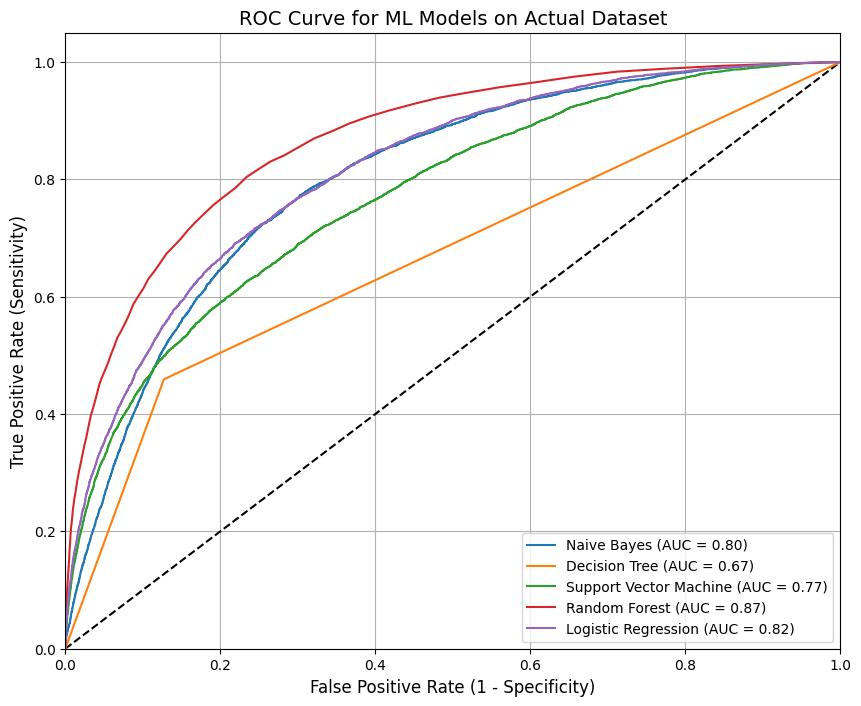

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('preprocessed_dataset.csv')

# Convert date columns to datetime and then to numerical values
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            # Try to convert to datetime
            data[col] = pd.to_datetime(data[col])
            # Convert datetime to numerical value (timestamp)
            data[col] = data[col].astype(np.int64) // 10**9
        except (ValueError, TypeError):
            # If not a date, try label encoding for categorical variables
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))

# Assuming the last column is the target and others are features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# If target is categorical, encode it
if isinstance(y[0], str):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

# Train each classifier and plot ROC curve
for name, clf in classifiers.items():
    try:
        clf.fit(X_train, y_train)

        # Get predicted probabilities
        if hasattr(clf, "predict_proba"):
            y_score = clf.predict_proba(X_test)[:, 1]
        else:
            y_score = clf.decision_function(X_test)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    except Exception as e:
        print(f"Error with {name}: {str(e)}")

# Format the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve for ML Models on Actual Dataset', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

# Save and show the plot
plt.savefig('roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Training ANN model...
Training LSTM model...
Generating predictions...


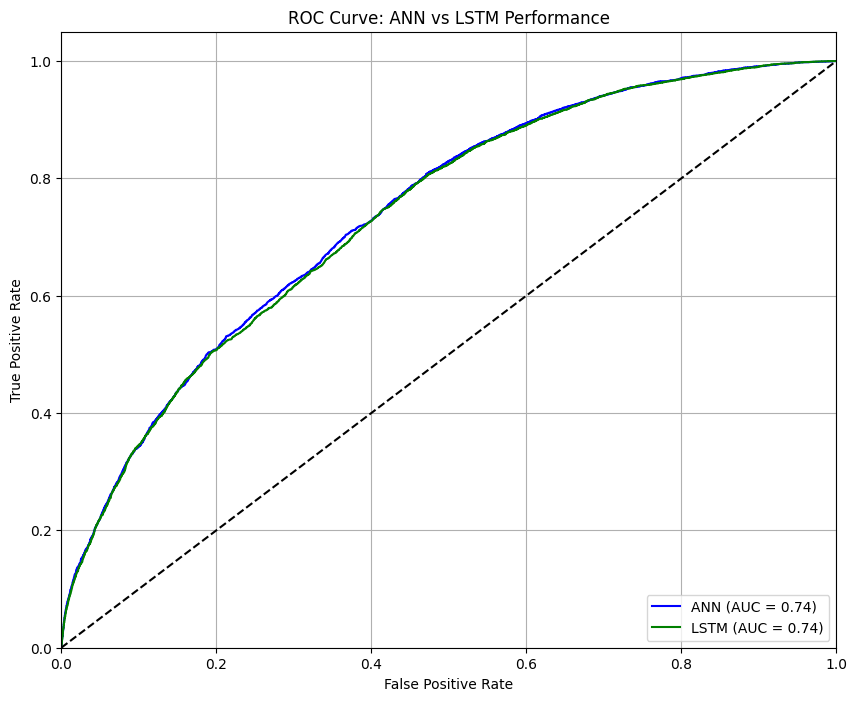

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Suppress unnecessary output
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load and preprocess data
data = pd.read_csv('preprocessed_dataset.csv')

# Preprocess data
def preprocess_data(df):
    for col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col]).astype('int64') // 10**9
        except (ValueError, TypeError):
            if df[col].dtype == 'object':
                df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df

# Process features and target
X = preprocess_data(data.iloc[:, :-1].copy()).values
y = data.iloc[:, -1].values
if isinstance(y[0], str):
    y = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data properly
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)       # Transform test data using same scaler

# Reshape for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model definitions
def create_ann():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([
        LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Train models
print("Training ANN model...")
ann = KerasClassifier(model=create_ann, epochs=50, batch_size=32, verbose=0)
ann.fit(X_train, y_train)

print("Training LSTM model...")
lstm = KerasClassifier(model=create_lstm, epochs=50, batch_size=32, verbose=0)
lstm.fit(X_train_lstm, y_train)

# Get predictions
print("Generating predictions...")
y_pred_ann = ann.predict_proba(X_test)[:, 1]
y_pred_lstm = lstm.predict_proba(X_test_lstm)[:, 1]

# Calculate ROC curves
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_ann, tpr_ann, 'b', label=f'ANN (AUC = {roc_auc_ann:.2f})')
plt.plot(fpr_lstm, tpr_lstm, 'g', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN vs LSTM Performance')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


Selected Features: ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']


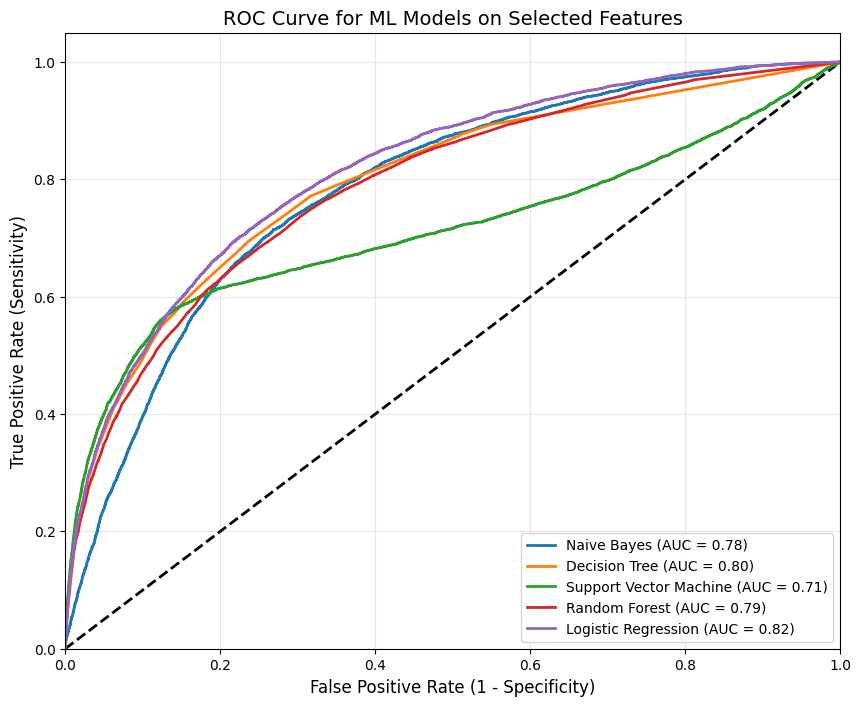

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load preprocessed dataset
data = pd.read_csv('modified_dataset1.csv')

# Separate features and target
X = data.iloc[:, :-1]  # All columns except last
y = data.iloc[:, -1]   # Last column as target

# Convert categorical target to binary if needed
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Feature selection - select top 10 features (adjust k as needed)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names if available
try:
    selected_features = X.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))
except:
    pass

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line

# Train each classifier and plot ROC curve
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # Get predicted probabilities
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Format the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve for ML Models on Selected Features', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Save and show the plot
plt.savefig('roc_curve_feature_selected.png', dpi=300, bbox_inches='tight')
plt.show()

Training ANN model...
Training LSTM model...
Generating predictions...


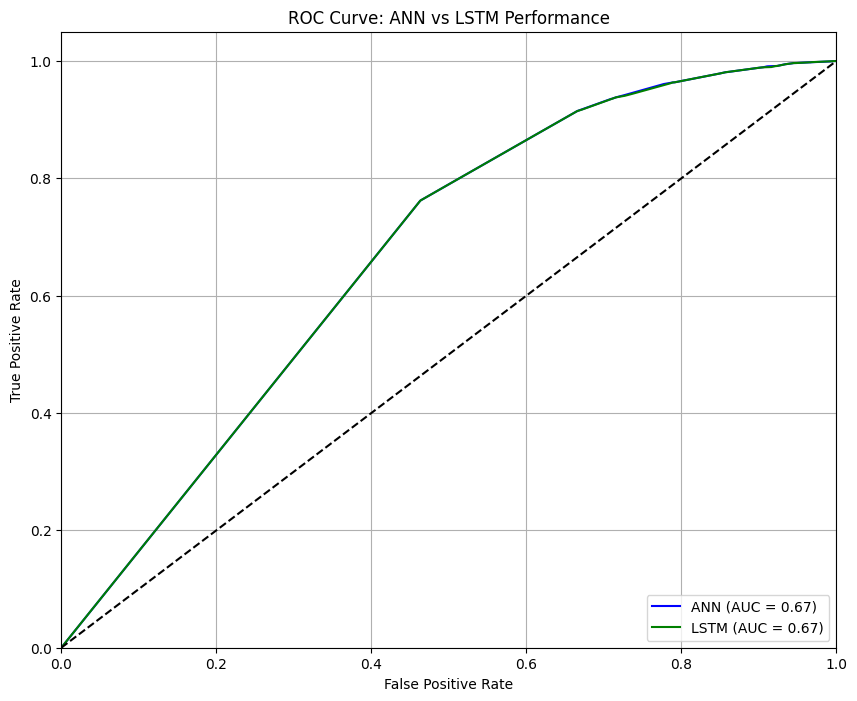

In [ ]:
!pip install scikeras -q > /dev/null 2>&1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Suppress unnecessary output
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load and preprocess data
data = pd.read_csv('modified_dataset1.csv')

# Preprocess data
def preprocess_data(df):
    for col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col]).astype('int64') // 10**9
        except (ValueError, TypeError):
            if df[col].dtype == 'object':
                df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df

# Process features and target
X = preprocess_data(data.iloc[:, :-1].copy()).values
y = data.iloc[:, -1].values
if isinstance(y[0], str):
    y = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data properly
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)       # Transform test data using same scaler

# Reshape for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model definitions
def create_ann():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([
        LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Train models
print("Training ANN model...")
ann = KerasClassifier(model=create_ann, epochs=50, batch_size=32, verbose=0)
ann.fit(X_train, y_train)

print("Training LSTM model...")
lstm = KerasClassifier(model=create_lstm, epochs=50, batch_size=32, verbose=0)
lstm.fit(X_train_lstm, y_train)

# Get predictions
print("Generating predictions...")
y_pred_ann = ann.predict_proba(X_test)[:, 1]
y_pred_lstm = lstm.predict_proba(X_test_lstm)[:, 1]

# Calculate ROC curves
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_ann, tpr_ann, 'b', label=f'ANN (AUC = {roc_auc_ann:.2f})')
plt.plot(fpr_lstm, tpr_lstm, 'g', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN vs LSTM Performance')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_feature_select_ann_lstm.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import math

# Load and preprocess dataset
df = pd.read_csv('modified_dataset1.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Ensure enough rows
min_test_size = 11284
if len(df) <= min_test_size:
    raise ValueError(f"Dataset must have more than {min_test_size} rows. Current rows: {len(df)}")

# Calculate dynamic test size ratio
test_size_ratio = min_test_size / len(df)

# Features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Store feature names after encoding
feature_names = X.columns.tolist()

# Scale and apply polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_scaled = scaler.fit_transform(X)
X_poly = poly.fit_transform(X_scaled)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=test_size_ratio, stratify=y, random_state=42
)
assert len(y_test) == 11284, f"Test set size is {len(y_test)}, expected 11,284."

# Train Decision Tree model
model = DecisionTreeClassifier(
    max_depth=10,
    class_weight={0: 1, 1: 3},
    random_state=42
)
model.fit(X_train, y_train)

# Predict probabilities on test set
y_prob = model.predict_proba(X_test)[:, 1]

# Tune threshold
thresholds = np.linspace(0.3, 0.6, 50)
best_threshold = 0.5
best_precision = 0

for thresh in thresholds:
    y_pred_temp = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp, zero_division=0)
    if acc >= 0.8 and prec > best_precision:
        best_threshold = thresh
        best_precision = prec

# Final prediction and metrics
y_pred_binary = (y_prob >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_prob)

# G-Mean
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
specificity = tn / (tn + fp)
gmean = math.sqrt(recall * specificity)

# Output results
print(f"\nModel Performance:")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"ROC AUC: {roc_auc * 100:.2f}%")
print(f"G-Mean: {gmean * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nEnter values for the following features to predict if it will rain tomorrow:")

user_input = []
for col in feature_names:
    val = float(input(f"{col}: "))
    user_input.append(val)

# Prepare user input: scale + poly transform
user_input_scaled = scaler.transform([user_input])
user_input_poly = poly.transform(user_input_scaled)

# Predict
user_prob = model.predict_proba(user_input_poly)[0][1]
user_pred = int(user_prob >= best_threshold)

# Output user prediction
print(f"\nPrediction Probability of Rain Tomorrow: {user_prob * 100:.2f}%")
if user_pred == 1:
    print("It is likely to rain tomorrow.")
else:
    print("It is unlikely to rain tomorrow.")



Model Performance:
Best Threshold: 0.59
Accuracy: 82.91%
Precision: 51.29%
Recall: 48.13%
F1-Score: 49.66%
ROC AUC: 77.76%
G-Mean: 65.92%

Confusion Matrix:
[[8405  903]
 [1025  951]]

Enter values for the following features to predict if it will rain tomorrow:
Rainfall: -0.277
WindGustSpeed: 15
Humidity9am: 0.78
Humidity3pm: 0.71
Cloud9am: 0.85
Cloud3pm: 0.96
RainToday: 1

Prediction Probability of Rain Tomorrow: 83.81%
It is likely to rain tomorrow.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
